In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit
import sklearn_evaluation.plot.grid_search


%matplotlib inline

In [2]:
import heapq
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
def write_ans(preds):
    answer = pd.DataFrame(test['id'])
    answer['sentiment'] = preds
    answer.to_csv('attempt15.csv', index=False)

In [20]:
def grid_plot(x, y, x_label, title, y_label='accuracy'):
    plt.figure(figsize=(12, 6))
    plt.grid(True),
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# CONTEST 2

# Import and preprocess data

In [8]:
data = pd.read_csv('train.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.drop('author', axis = 1, inplace = True)
data.head()

,content,sentiment
0,"@treasaint salad stuff, some chillis, whatever...",happiness
1,"@sunnyjamiel sunny, I'm a workin' on it. It's ...",neutral
2,@jolynnchew so early??,surprise
3,"So now, I have conjunctivitis in my left eye. ...",sadness
4,"Out and about in Deal, Kent. More sunshine req...",love


In [9]:
count_vectorizer = CountVectorizer(min_df=2, ngram_range=(1, 1)) 

In [10]:
X_train = np.ravel(data.as_matrix(columns=['content']))
Y_train = np.ravel(data.as_matrix(columns=['sentiment']))
X_train.shape, Y_train.shape

((30000,), (30000,))

In [11]:
test = pd.read_csv('test.csv')
test.drop('author', axis=1, inplace=True)

In [12]:
test.head()

,id,content
0,32823,Good Morning
1,16298,I just put my computer up on craigslist. I've ...
2,28505,in ten minutes shopping demi lovato-back aro...
3,6689,From twitterberry moved to ubertwitter - suffe...
4,26893,@thriftymom TEAR*


In [13]:
X_test = np.ravel(test.as_matrix(columns=['content']))
X_test.shape

(10000,)

In [14]:
data.groupby(['sentiment']).count()

,content
sentiment,
anger,83
boredom,136
empty,624
enthusiasm,555
fun,1355
happiness,3921
hate,991
love,2901
neutral,6455


In [15]:
sparse_feature_matrix = count_vectorizer.fit_transform(X_train)

# GridSearchCV для LogisticRegression

In [16]:
lr_grid = {'C': np.concatenate((np.linspace(.1, .9, 9), np.linspace(10, 100, 20)))}
gs = GridSearchCV(LogisticRegression(penalty='l1'), lr_grid, scoring='accuracy', cv=5, n_jobs=-1)
%time  gs.fit(sparse_feature_matrix, Y_train)
gs.best_params_, gs.best_score_

CPU times: user 3.41 s, sys: 222 ms, total: 3.64 s
Wall time: 3min 37s


({'C': 0.5}, 0.3554333333333333)

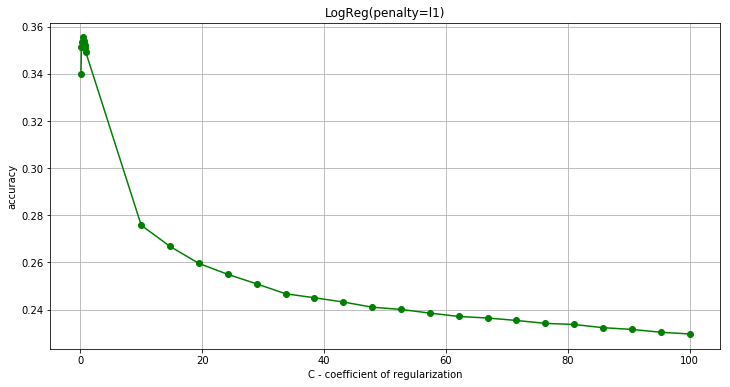

In [21]:
grid_plot(lr_grid['C'], gs.cv_results_['mean_test_score'], 'C - coefficient of regularization', 'LogReg(penalty=l1)')

In [27]:
lr_grid = {'C': np.linspace(0.43, 0.48, 7)}
gs = GridSearchCV(LogisticRegression(penalty='l1'), lr_grid, scoring='accuracy', cv=5, n_jobs=-1)
%time  gs.fit(sparse_feature_matrix, Y_train)
gs.best_params_, gs.best_score_

CPU times: user 1.47 s, sys: 96.6 ms, total: 1.57 s
Wall time: 12.6 s


({'C': 0.45499999999999996}, 0.3557666666666667)

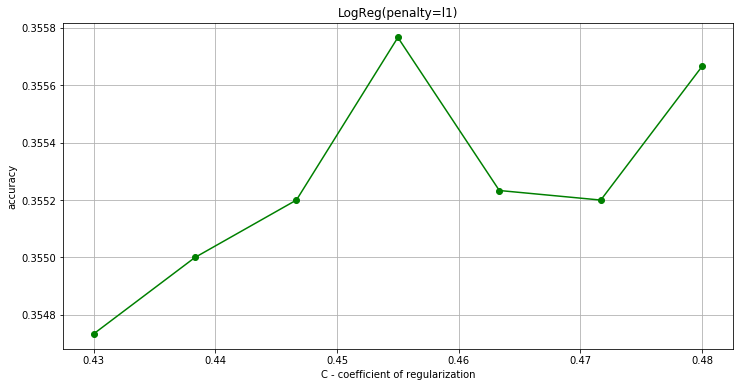

In [28]:
grid_plot(lr_grid['C'], gs.cv_results_['mean_test_score'], 'C - coefficient of regularization', 'LogReg(penalty=l1)')

In [30]:
gs.best_params_

{'C': 0.45499999999999996}

In [31]:
algo = LogisticRegression(penalty='l1', C=0.455)
arr = cross_val_score(algo, sparse_feature_matrix, Y_train, cv=5, scoring='accuracy')
print(arr)
print(np.mean(arr))

[0.36324288 0.36389398 0.34705784 0.35161721 0.35284309]
0.3557310005106096


In [32]:
algo.fit(sparse_feature_matrix, Y_train)

LogisticRegression(C=0.455, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
predict = algo.predict(count_vectorizer.transform(X_test))

In [35]:
write_ans(predict)

Эта попытка дала 0.36260 на Privat'e, что, в принципе, достаточно для того, чтобы обойти оба benchmark'a.